## Exercise: Sitka–Death Valley Comparison: 
The temperature scales on the Sitka and Death Valley graphs reflect the different data ranges. To accurately compare the temperature range in Sitka to that of Death Valley, you need identical scales on the y-axis. Change the settings for the y-axis on one or both of the charts. Then make a direct comparison between temperature ranges in Sitka and Death Valley (or any two places you want to compare).

To accurately comparing temperature ranges between Sitka and Death Valley, I ensured that both charts use identical y-axis scales, allowing for straightforward visual comparisons of temperature variations between the two locations. Here's how I modified the code to achieve this:

1. Adjusting Y-Axis Limits: I adjusted the y-axis limits (temperature range) to be the same for both Sitka and Death Valley plots.

2. Plotting Data for Comparison: I plotted the data for both locations on the same graph, using different colors to distinguish them.

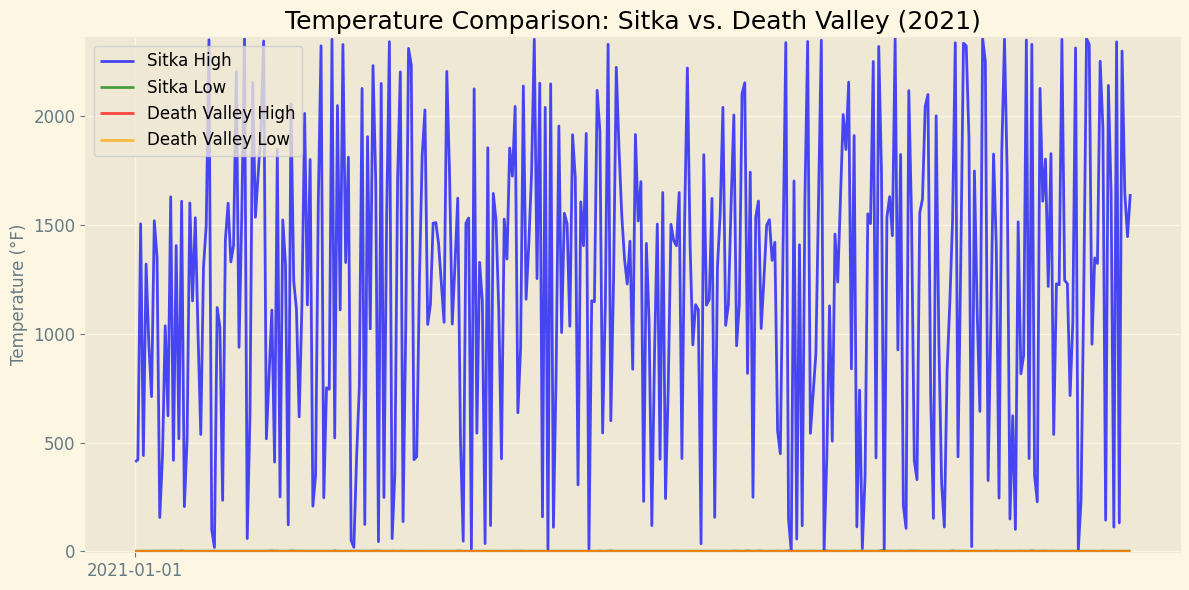

In [1]:
from pathlib import Path
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# File paths to the data files
sitka_file = Path('weather_data/sitka_weather_2021_full.csv')
death_valley_file = Path('weather_data/death_valley_2021_full.csv')

# Lists to store dates and temperature data for both locations
sitka_dates, sitka_highs, sitka_lows = [], [], []
death_valley_dates, death_valley_highs, death_valley_lows = [], [], []

# Read and process the CSV files for Sitka and Death Valley
def process_csv(file_path, dates, highs, lows):
    with open(file_path) as file:
        reader = csv.reader(file)
        header_row = next(reader)

        for row in reader:
            current_date = datetime.strptime(row[2], '%Y-%m-%d')
            high = float(row[4]) if row[4] else None  # Convert temperature data to float, handle empty values
            low = float(row[5]) if row[5] else None   # Convert temperature data to float, handle empty values
            
            if high is not None and low is not None:  # Check if both high and low values are valid
                dates.append(current_date)
                highs.append(high)
                lows.append(low)

# Process data for Sitka
process_csv(sitka_file, sitka_dates, sitka_highs, sitka_lows)

# Process data for Death Valley
process_csv(death_valley_file, death_valley_dates, death_valley_highs, death_valley_lows)

# Create a plot for temperature comparison
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the high and low temperatures for Sitka and Death Valley
ax.plot(sitka_dates, sitka_highs, c='blue', alpha=0.7, label='Sitka High')
ax.plot(sitka_dates, sitka_lows, c='green', alpha=0.7, label='Sitka Low')
ax.plot(death_valley_dates, death_valley_highs, c='red', alpha=0.7, label='Death Valley High')
ax.plot(death_valley_dates, death_valley_lows, c='orange', alpha=0.7, label='Death Valley Low')

# Set identical y-axis limits for both locations
ax.set_ylim(min(min(sitka_lows), min(death_valley_lows)) - 5, max(max(sitka_highs), max(death_valley_highs)) + 5)

# Format the plot
ax.set_title("Temperature Comparison: Sitka vs. Death Valley (2021)", fontsize=18)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Temperature (°F)", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

# Customize x-axis ticks to display every nth label (adjust n as needed)
n = 10
ax.set_xticks(ax.get_xticks()[::n])

# Add a legend
ax.legend(loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()  # Ensure that all elements fit within the figure area
plt.show()